In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### try out sm with the default dataset:

In [4]:
data = sm.datasets.get_rdataset("dietox", "geepack").data

In [5]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

In [6]:
mdf = md.fit()

In [7]:
data

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11


In [8]:
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



# build test dataset

In [22]:
markers = np.random.choice(a=[-1,0,1, np.nan], size=(800, 500))

In [23]:
markers = pd.DataFrame(markers)

In [24]:
markers.index  = ['Individual'+str(i) for i in markers.index]

In [25]:
markers.columns = ['mrk'+str(marker) for marker in markers.columns]

In [26]:
sex = np.random.choice([0,1], size=800)

In [27]:
pheno = np.random.normal(loc=790,scale=30, size=800)

In [28]:
Generations = ['F2', 'F3', 'F4','F5','F6','F7','F8','F9','F10','F11','F13','F14','F15']
gens = np.random.choice(a=Generations, size=800)

In [29]:
markers['sex'] = sex
markers['pheno'] = pheno
markers['gens'] = gens

In [33]:
markers['mrk20']

Individual0     -1.0
Individual1      1.0
Individual2     -1.0
Individual3      NaN
Individual4      1.0
                ... 
Individual795   -1.0
Individual796    0.0
Individual797    0.0
Individual798    NaN
Individual799    NaN
Name: mrk20, Length: 800, dtype: float64

In [36]:
marker = 'mrk20'
subset = markers.loc[markers['mrk20'].isna()==False]
md = smf.mixedlm("pheno ~ mrk20+sex", data=subset, groups=subset["gens"],)

In [37]:
mdf = md.fit()

/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [16]:
def make_model(marker, data):
    subset = data.loc[data[marker].isna()==False]
    md = smf.mixedlm("pheno ~ {marker}+sex".format(marker=marker), data=subset, groups=subset["gens"])
    try:
        mdf = md.fit()
        return marker, mdf.pvalues[marker]
    except:
        print('linalgerror at marker {marker}'.format(marker=marker) )
        return marker, np.nan

In [ ]:
subset = markers.loc[markers['mrk0'].isna()==False]

#md = smf.mixedlm("pheno ~ {marker}+sex".format(marker=marker), data=subset, groups=subset["gens"])
#mdf = md.fit()


In [ ]:
md = smf.mixedlm("pheno ~ {marker}+sex".format(marker=marker), data=subset, groups=subset["gens"])

In [ ]:
mdf = md.fit()

In [17]:
pvals = {}
for marker in markers.columns:
    if marker.startswith('mrk'):
        #print(marker)
        m, p = make_model(marker=marker, data=markers)
        #print(m, p)
        pvals[m]=p

/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk4


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk6


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk12


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk13


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk17


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk21


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk24


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk29


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk32


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk34


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk39


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk40


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk45


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk46


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk50


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk52


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk54


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk57


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk60


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk61


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk62


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk65


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk66


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk67


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk70


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk76


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk77


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk93


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk94


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk96


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk97


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk99


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk103


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk105


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk106


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk108


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk110


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk111


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk112


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk116


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk123


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk124


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk135


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk138


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk143


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk149


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk152


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk153


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk154


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk156


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk157


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk160


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk162


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk168


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk171


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk175


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk183


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk186


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk187


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk193


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk196


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk199


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk200


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk201


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk206


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk209


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk212


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk215


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk216


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk218


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk224


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk229


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk231


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk232


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk238


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk241


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk243


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk247


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk248


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk249


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk251


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk255


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk259


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk268


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk277


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk282


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk286


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk288


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk294


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk299


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk308


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk312


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk315


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk316


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk322


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk326


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk330


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk331


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk333


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk336


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk337


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk342


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk345


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk346


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk347


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk353


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk358


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk359


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk360


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk362


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk365


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk366


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk368


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk369


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk377


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk382


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk384


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk388


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk399


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk400


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk401


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk405


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk413


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk415


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk417


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk420


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk426


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk431


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk432


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk436


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk437


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk444


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk445


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk448


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk449


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk450


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk451


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk457


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk464


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk473


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk475


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk477


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk479


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk481


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk486


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk496


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk498


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk500


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk501


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk505


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk515


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk521


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk523


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk524


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk526


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk528


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk530


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk533


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk537


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk539


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk545


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk548


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk550


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk553


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk555


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk560


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk561


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk572


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk574


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk576


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk580


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk585


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk589


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk590


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk591


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk594


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk595


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk596


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk597


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk600


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk603


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk604


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk608


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk623


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk624


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk626


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk629


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk634


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk638


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk645


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk647


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk650


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk651


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk654


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk655


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk663


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk664


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk668


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk681


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk682


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk686


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk687


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk689


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk692


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk693


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk697


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk701


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk703


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk704


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk706


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk709


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk710


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk711


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk714


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk716


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk718


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk720


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk722


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk723


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk731


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk732


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk736


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk738


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk739


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk741


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk743


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk746


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk747


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk750


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk760


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk762


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk766


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk767


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk771


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk774


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk775


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk779


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk781


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk782


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk786


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk788


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk790


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk795


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk801


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk809


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk810


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk826


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk828


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk830


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk832


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk838


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk842


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk848


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk849


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk850


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk851


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk852


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk860


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk870


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk871


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk875


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk877


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk879


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk880


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk884


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk886


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk890


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk892


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk894


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk902


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk903


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk906


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk907
linalgerror at marker mrk911


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk915


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk918


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk920


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk922


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk923


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk934


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk936


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk944


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk946


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk952


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk953


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk955


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk956


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk957


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk958


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk960


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk965


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk970


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk971


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk981


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk983


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk987


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk988


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk989


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk990


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk991


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk992


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk993


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1005


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1007


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1014


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1017


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1027


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1030


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1032


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1035


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1037


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1044


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1046


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1049


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1059


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1062


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1068


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1076


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1077


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1078


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1079


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1082


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1085


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1089


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


linalgerror at marker mrk1091


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1093


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1096


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1099


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1102


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1107


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1112


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1115


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1118


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1125


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1137


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1138


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1139


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1143


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1148


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1149


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1152


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1158


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1161


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1166


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1167


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1169


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1172


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1174


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1176


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1189


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1191


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1192


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1194


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk1196


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1198


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1204


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1205


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1213


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1226


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1233


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1234


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1235


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1236


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1238


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1244


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1249


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1251


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1261


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1263


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1264


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1265


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1270


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1271


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1282


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1284


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1290


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1301


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1304


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk1309


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1311


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1314


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1321


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1324


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1327


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1333


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1334


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1335


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1338


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1340


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1341


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1343


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1345


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1348


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1349


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1354


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1358


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1359


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1367


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1368


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1371


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1376


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1380


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1386


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1387


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1389


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1390


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1395


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1396


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1399


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1401


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1404


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1405


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1407


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1411


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1414


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1416


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1417


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1419


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk1424


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1427


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1429


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1435


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1438


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1440


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1441


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1450


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1452


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1460


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1461


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1469


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1475


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1479


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1481


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1496


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1497


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1498


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1499


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1505


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1506


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1511


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1515


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1519


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1521


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1529


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1531


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1533


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1541


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1543


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the b

linalgerror at marker mrk1557


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1563


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1569


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1573


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1575


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1581


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1586


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1587


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1597


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1602


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1604


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1607


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1608


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1610


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1620


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1623


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1626


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1628


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1632


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1633


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1634


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1635


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1637


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1639


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1642


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1646


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1650


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1651


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2170: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encounte

linalgerror at marker mrk1652


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1662


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1664


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: Conve

linalgerror at marker mrk1678


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1679


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1685


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1686


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1689


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1690


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1692


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1700


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1701


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1703


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1708


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1711


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1717


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1718


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1719


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1722


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1723


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1725


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1728


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1736


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1738


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1744


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1745


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1751


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1765


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1768


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1769


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1770


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1775


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1779


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1780


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1790


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1795


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1797


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1798


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1799


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1803


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1807


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1808


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1811


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1812


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1826


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1828


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1831


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1832


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1833


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1834


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1839


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1840


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1841


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1842


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1843


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1844


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1845


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1848


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1849


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1853


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1857


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1859


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1861


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1864


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1866


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1868


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1873


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1876


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1877


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1878


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retryin

linalgerror at marker mrk1891


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1892


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1893


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1895


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1897


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1899


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1900


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to c

linalgerror at marker mrk1918


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1936


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1937


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1939


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1940


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1942


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1943


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1945


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1946


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1951


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_ret

linalgerror at marker mrk1955


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1957


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1959


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


linalgerror at marker mrk1965


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1967


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1968


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1969


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1974


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


linalgerror at marker mrk1977


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1980


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the paramet

linalgerror at marker mrk1986


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

linalgerror at marker mrk1999


/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/home/tilman/miniconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


In [20]:
l = []
for k, i in pvals.items():
    l.append([k,i])

In [22]:
ldf = pd.DataFrame(l)

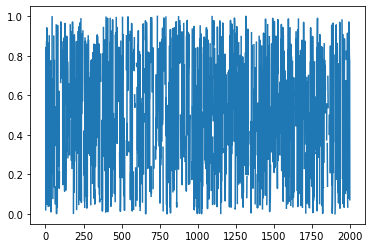

In [26]:
plt.plot(ldf.index, ldf[1]) 
plt.show()

# load cross

In [38]:
cross = pd.read_csv('20201123_cross.csv', low_memory=False)
cross = cross.drop([0,1])
cross = cross.reset_index()

cross = cross.replace('AA', -1)
cross = cross.replace('AB', 0)
cross = cross.replace('BB', 1)
cross = cross.replace('-', np.nan)

cross.GENERATION = ['F'+str(i) for i in cross.GENERATION]
cross.DAM = ['D'+str(i) for i in cross.DAM]


cross = cross.loc[cross.BW8.isna()==False]
cross.BW8 = cross.BW8.astype(int)
cross.SEX = cross.SEX.astype(int)


cnew = []
for i in cross.columns:
    if '-' in i:
        ni = 'mrk_'+'_'.join(i.split('-'))
    else:
        ni = i
    cnew.append(ni)
        
        
cross.columns = cnew


cross_markers = [i for i in cross.columns if i.startswith('mrk')]
#for marker in cross_markers:
    #cross[marker] = cross[marker].astype(float)

In [41]:
cross = cross.loc[cross.BW8.isna()==False]
cross.BW8 = cross.BW8.astype(int)
cross.SEX = cross.SEX.astype(int)

In [42]:
cnew = []
for i in cross.columns:
    if '-' in i:
        ni = 'mrk_'+'_'.join(i.split('-'))
    else:
        ni = i
    cnew.append(ni)
        
        

In [43]:
cross.columns = cnew

In [46]:
cross_markers = [i for i in cross.columns if i.startswith('mrk')]
#for marker in cross_markers:
    #cross[marker] = cross[marker].astype(float)

# test model on individual marker

In [47]:
data=cross
marker = 'mrk_4_15'
subset = data.loc[data[marker].isna()==False] 
pheno  = 'BW8'


In [51]:
marker = "+".join(cross_markers)

In [52]:
md = smf.mixedlm("{pheno} ~ {marker}+SEX".format(pheno=pheno, marker=marker), data=subset, groups=subset["GENERATION"])

ValueError: zero-size array to reduction operation maximum which has no identity

In [49]:
mdf = md.fit()

In [50]:
mdf.pvalues

Intercept     2.893174e-71
mrk_4_15      1.310536e-06
SEX          3.665883e-117
Group Var     2.891771e-02
dtype: float64

# run model

In [ ]:
subset = data.loc[data[marker].isna()==False] 

In [324]:
def make_chicken_model(marker, data, pheno='BW8',):
    #drop all individuals where marker is missing
    subset = data.loc[data[marker].isna()==False] 
    
    md = smf.mixedlm("{pheno} ~ {marker}+ SEX".format(pheno=pheno, marker=marker), data=subset, groups='GENERATION')
    try:
        mdf = md.fit()
        return marker, mdf.pvalues[marker], mdf
    except:
        print('linalgerror at marker {marker}'.format(marker=marker) )
        return marker, np.nan, None

In [325]:
pvals = {}
for marker in cross_markers:
    #print(marker)
    m, p, model = make_chicken_model(marker=marker, data=cross)
 #print(m, p)
    pvals[m]={'pvalue':p, 'model':model}

In [326]:
pp = []
for key, item in pvals.items():
    pp.append(item['pvalue'])

In [330]:
'-'.join('mrk_4_15'.lstrip('mrk_').split('_'))

'4-15'

In [334]:
pval2csv = []
for key, item in pvals.items():
    mrk = "-".join(key.lstrip('mrk_').split('_'))
    pval = item['pvalue']
    effectsize = pvals[key]['model'].params[key]
    se = pvals[key]['model'].bse_fe[key]
    ni = [mrk, pval, effectsize, se]
    pval2csv.append(ni)
    p_df = pd.DataFrame(pval2csv)
    p_df.columns = ['marker', 'pvalue', 'est_effectsize', 'effectsize_SE' ]

In [340]:
p_df['bh_adj_pvalue_5perc'] = bh_corrected[1]
p_df['bh_tresh_pvalue'] = bh_corrected[0]

In [354]:
p_df.to_csv('20201123_mlm_results.csv')

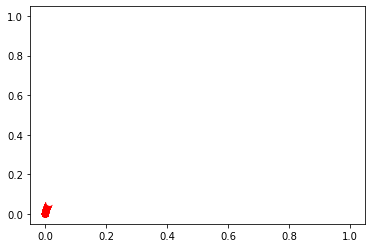

In [348]:
mkdict = {True:'red', False:'White'}
plt.scatter(p_df['pvalue'], p_df['bh_corr_pvalue_5perc'], color =[mkdict[i] for i in p_df['bh_tresh_pvalue']] )

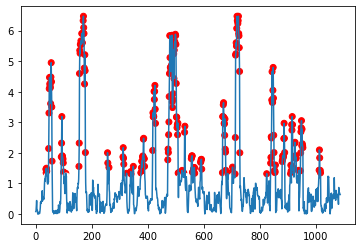

In [353]:
plt.plot(p_df.index, -1*np.log10(p_df['bh_adj_pvalue_5perc']))
plt.scatter(p_df.index, -1*np.log10(p_df['bh_adj_pvalue_5perc']),color =[mkdict[i] for i in p_df['bh_tresh_pvalue']])

In [327]:
bh_corrected = sm.stats.multipletests(pvals = pp, method = 'fdr_bh')
bf_corrected = sm.stats.multipletests(pvals = pp, method = 'bonferroni')

In [126]:
#pvals

In [127]:
l = []
for k, i in pvals.items():
    minlog = -1 * np.log10(i)
    l.append([k,minlog])

In [128]:
ldf = pd.DataFrame(l)

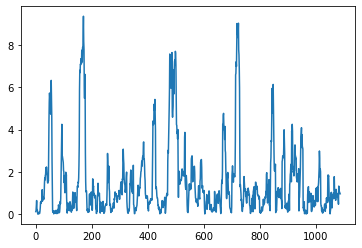

In [129]:
plt.plot(ldf.index, ldf[1])

In [131]:
all_markers = pd.DataFrame(["1-0",
"1-1",
"1-2",
"1-3",
"1-4",
"1-5",
"1-6",
"1-7",
"1-8",
"1-9",
"1-10",
"1-11",
"1-12",
"1-13",
"1-14",
"1-15",
"1-16",
"1-17",
"1-18",
"1-19",
"1-20",
"1-21",
"1-22",
"1-23",
"1-24",
"1-25",
"1-26",
"1-27",
"1-28",
"1-29",
"1-30",
"1-31",
"1-32",
"1-33",
"1-34",
"1-35",
"1-36",
"1-37",
"1-38",
"1-39",
"1-40",
"1-41",
"1-42",
"1-43",
"1-44",
"1-45",
"1-46",
"1-47",
"1-48",
"1-49",
"1-50",
"1-51",
"1-52",
"1-53",
"1-54",
"1-55",
"1-56",
"1-57",
"1-58",
"1-59",
"1-60",
"1-61",
"1-62",
"1-63",
"1-64",
"1-65",
"1-66",
"1-67",
"1-68",
"1-69",
"1-70",
"1-71",
"1-72",
"1-73",
"1-74",
"1-75",
"1-76",
"1-77",
"1-78",
"1-79",
"1-80",
"1-81",
"1-82",
"1-83",
"1-84",
"1-85",
"1-86",
"1-87",
"1-88",
"1-89",
"1-90",
"1-91",
"1-92",
"1-93",
"1-94",
"1-95",
"1-96",
"1-97",
"1-98",
"1-99",
"1-100",
"1-101",
"1-102",
"1-103",
"1-104",
"1-105",
"1-106",
"1-107",
"1-108",
"1-109",
"1-110",
"1-111",
"1-112",
"1-113",
"1-114",
"1-115",
"1-116",
"1-117",
"1-118",
"1-119",
"1-120",
"1-121",
"1-122",
"1-123",
"1-124",
"1-125",
"1-126",
"1-127",
"1-128",
"1-129",
"1-130",
"1-131",
"1-132",
"1-133",
"1-134",
"1-135",
"1-136",
"1-137",
"1-138",
"1-139",
"1-140",
"1-141",
"1-142",
"1-143",
"1-144",
"1-145",
"1-146",
"1-147",
"1-148",
"1-149",
"1-150",
"1-151",
"1-152",
"1-153",
"1-154",
"1-155",
"1-156",
"1-157",
"1-158",
"1-159",
"1-160",
"1-161",
"1-162",
"1-163",
"1-164",
"1-165",
"1-166",
"1-167",
"1-168",
"1-169",
"1-170",
"1-171",
"1-172",
"1-173",
"1-174",
"1-175",
"1-176",
"1-177",
"1-178",
"1-179",
"1-180",
"1-181",
"1-182",
"1-183",
"1-184",
"1-185",
"1-186",
"1-187",
"1-188",
"1-189",
"1-190",
"1-191",
"1-192",
"1-193",
"1-194",
"1-195",
"1-196",
"1-197",
"1-198",
"2-0",
"2-1",
"2-2",
"2-3",
"2-4",
"2-5",
"2-6",
"2-7",
"2-8",
"2-9",
"2-10",
"2-11",
"2-12",
"2-13",
"2-14",
"2-15",
"2-16",
"2-17",
"2-18",
"2-19",
"2-20",
"2-21",
"2-22",
"2-23",
"2-24",
"2-25",
"2-26",
"2-27",
"2-28",
"2-29",
"2-30",
"2-31",
"2-32",
"2-33",
"2-34",
"2-35",
"2-36",
"2-37",
"2-38",
"2-39",
"2-40",
"2-41",
"2-42",
"2-43",
"2-44",
"2-45",
"2-46",
"2-47",
"2-48",
"2-49",
"2-50",
"2-51",
"2-52",
"2-53",
"2-54",
"2-55",
"2-56",
"2-57",
"2-58",
"2-59",
"2-60",
"2-61",
"2-62",
"2-63",
"2-64",
"2-65",
"2-66",
"2-67",
"2-68",
"2-69",
"2-70",
"2-71",
"2-72",
"2-73",
"2-74",
"2-75",
"2-76",
"2-77",
"2-78",
"2-79",
"2-80",
"2-81",
"2-82",
"2-83",
"2-84",
"2-85",
"2-86",
"2-87",
"2-88",
"2-89",
"2-90",
"2-91",
"2-92",
"2-93",
"2-94",
"2-95",
"2-96",
"2-97",
"2-98",
"2-99",
"2-100",
"2-101",
"2-102",
"2-103",
"2-104",
"2-105",
"2-106",
"2-107",
"2-108",
"2-109",
"2-110",
"2-111",
"2-112",
"2-113",
"2-114",
"2-115",
"2-116",
"2-117",
"2-118",
"2-119",
"2-120",
"2-121",
"2-122",
"2-123",
"2-124",
"2-125",
"2-126",
"2-127",
"2-128",
"2-129",
"2-130",
"2-131",
"2-132",
"2-133",
"2-134",
"2-135",
"2-136",
"2-137",
"2-138",
"2-139",
"2-140",
"2-141",
"2-142",
"2-143",
"2-144",
"2-145",
"2-146",
"2-147",
"2-148",
"2-149",
"2-150",
"3-0",
"3-1",
"3-2",
"3-3",
"3-4",
"3-5",
"3-6",
"3-7",
"3-8",
"3-9",
"3-10",
"3-11",
"3-12",
"3-13",
"3-14",
"3-15",
"3-16",
"3-17",
"3-18",
"3-19",
"3-20",
"3-21",
"3-22",
"3-23",
"3-24",
"3-25",
"3-26",
"3-27",
"3-28",
"3-29",
"3-30",
"3-31",
"3-32",
"3-33",
"3-34",
"3-35",
"3-36",
"3-37",
"3-38",
"3-39",
"3-40",
"3-41",
"3-42",
"3-43",
"3-44",
"3-45",
"3-46",
"3-47",
"3-48",
"3-49",
"3-50",
"3-51",
"3-52",
"3-53",
"3-54",
"3-55",
"3-56",
"3-57",
"3-58",
"3-59",
"3-60",
"3-61",
"3-62",
"3-63",
"3-64",
"3-65",
"3-66",
"3-67",
"3-68",
"3-69",
"3-70",
"3-71",
"3-72",
"3-73",
"3-74",
"3-75",
"3-76",
"3-77",
"3-78",
"3-79",
"3-80",
"3-81",
"3-82",
"3-83",
"3-84",
"3-85",
"3-86",
"3-87",
"3-88",
"3-89",
"3-90",
"3-91",
"3-92",
"3-93",
"3-94",
"3-95",
"3-96",
"3-97",
"3-98",
"3-99",
"3-100",
"3-101",
"3-102",
"3-103",
"3-104",
"3-105",
"3-106",
"3-107",
"3-108",
"3-109",
"3-110",
"3-111",
"4-0",
"4-1",
"4-2",
"4-3",
"4-4",
"4-5",
"4-6",
"4-7",
"4-8",
"4-9",
"4-10",
"4-11",
"4-12",
"4-13",
"4-14",
"4-15",
"4-16",
"4-17",
"4-18",
"4-19",
"4-20",
"4-21",
"4-22",
"4-23",
"4-24",
"4-25",
"4-26",
"4-27",
"4-28",
"4-29",
"4-30",
"4-31",
"4-32",
"4-33",
"4-34",
"4-35",
"4-36",
"4-37",
"4-38",
"4-39",
"4-40",
"4-41",
"4-42",
"4-43",
"4-44",
"4-45",
"4-46",
"4-47",
"4-48",
"4-49",
"4-50",
"4-51",
"4-52",
"4-53",
"4-54",
"4-55",
"4-56",
"4-57",
"4-58",
"4-59",
"4-60",
"4-61",
"4-62",
"4-63",
"4-64",
"4-65",
"4-66",
"4-67",
"4-68",
"4-69",
"4-70",
"4-71",
"4-72",
"4-73",
"4-74",
"4-75",
"4-76",
"4-77",
"4-78",
"4-79",
"4-80",
"4-81",
"4-82",
"4-83",
"4-84",
"4-85",
"4-86",
"4-87",
"4-88",
"4-89",
"4-90",
"4-91",
"4-92",
"5-0",
"5-1",
"5-2",
"5-3",
"5-4",
"5-5",
"5-6",
"5-7",
"5-8",
"5-9",
"5-10",
"5-11",
"5-12",
"5-13",
"5-14",
"5-15",
"5-16",
"5-17",
"5-18",
"5-19",
"5-20",
"5-21",
"5-22",
"5-23",
"5-24",
"5-25",
"5-26",
"5-27",
"5-28",
"5-29",
"5-30",
"5-31",
"5-32",
"5-33",
"5-34",
"5-35",
"5-36",
"5-37",
"5-38",
"5-39",
"5-40",
"5-41",
"5-42",
"5-43",
"5-44",
"5-45",
"5-46",
"5-47",
"5-48",
"5-49",
"5-50",
"5-51",
"5-52",
"5-53",
"5-54",
"5-55",
"5-56",
"5-57",
"5-58",
"5-59",
"5-60",
"5-61",
"5-62",
"5-63",
"5-64",
"5-65",
"5-66",
"5-67",
"5-68",
"5-69",
"5-70",
"5-71",
"5-72",
"5-73",
"5-74",
"5-75",
"5-76",
"5-77",
"5-78",
"5-79",
"5-80",
"5-81",
"5-82",
"5-83",
"6-0",
"6-1",
"6-2",
"6-3",
"6-4",
"6-5",
"6-6",
"6-7",
"6-8",
"6-9",
"6-10",
"6-11",
"6-12",
"6-13",
"6-14",
"6-15",
"6-16",
"6-17",
"6-18",
"6-19",
"6-20",
"6-21",
"6-22",
"6-23",
"6-24",
"6-25",
"6-26",
"6-27",
"6-28",
"6-29",
"6-30",
"6-31",
"6-32",
"6-33",
"6-34",
"6-35",
"6-36",
"6-37",
"6-38",
"6-39",
"6-40",
"6-41",
"6-42",
"6-43",
"6-44",
"6-45",
"6-46",
"6-47",
"6-48",
"6-49",
"6-50",
"6-51",
"6-52",
"6-53",
"6-54",
"6-55",
"6-56",
"6-57",
"6-58",
"6-59",
"6-60",
"7-0",
"7-1",
"7-2",
"7-3",
"7-4",
"7-5",
"7-6",
"7-7",
"7-8",
"7-9",
"7-10",
"7-11",
"7-12",
"7-13",
"7-14",
"7-15",
"7-16",
"7-17",
"7-18",
"7-19",
"7-20",
"7-21",
"7-22",
"7-23",
"7-24",
"7-25",
"7-26",
"7-27",
"7-28",
"7-29",
"7-30",
"7-31",
"7-32",
"7-33",
"7-34",
"7-35",
"7-36",
"7-37",
"8-0",
"8-1",
"8-2",
"8-3",
"8-4",
"8-5",
"8-6",
"8-7",
"8-8",
"8-9",
"8-10",
"8-11",
"8-12",
"8-13",
"8-14",
"8-15",
"8-16",
"8-17",
"8-18",
"8-19",
"8-20",
"8-21",
"8-22",
"8-23",
"8-24",
"8-25",
"8-26",
"8-27",
"8-28",
"8-29",
"8-30",
"8-31",
"8-32",
"8-33",
"8-34",
"8-35",
"8-36",
"8-37",
"9-0",
"9-1",
"9-2",
"9-3",
"9-4",
"9-5",
"9-6",
"9-7",
"9-8",
"9-9",
"9-10",
"9-11",
"9-12",
"9-13",
"9-14",
"9-15",
"9-16",
"9-17",
"9-18",
"9-19",
"9-20",
"9-21",
"9-22",
"9-23",
"9-24",
"9-25",
"9-26",
"9-27",
"9-28",
"9-29",
"9-30",
"9-31",
"10-0",
"10-1",
"10-2",
"10-3",
"10-4",
"10-5",
"10-6",
"10-7",
"10-8",
"10-9",
"10-10",
"10-11",
"10-12",
"10-13",
"10-14",
"10-15",
"10-16",
"10-17",
"10-18",
"10-19",
"10-20",
"10-21",
"10-22",
"10-23",
"10-24",
"10-25",
"11-0",
"11-1",
"11-2",
"11-3",
"11-4",
"11-5",
"11-6",
"11-7",
"11-8",
"11-9",
"11-10",
"11-11",
"11-12",
"11-13",
"11-14",
"11-15",
"11-16",
"11-17",
"11-18",
"11-19",
"11-20",
"11-21",
"11-22",
"12-0",
"12-1",
"12-2",
"12-3",
"12-4",
"12-5",
"12-6",
"12-7",
"12-8",
"12-9",
"12-10",
"12-11",
"12-12",
"12-13",
"12-14",
"12-15",
"12-16",
"12-17",
"12-18",
"12-19",
"12-20",
"12-21",
"13-0",
"13-1",
"13-2",
"13-3",
"13-4",
"13-5",
"13-6",
"13-7",
"13-8",
"13-9",
"13-10",
"13-11",
"13-12",
"13-13",
"13-14",
"13-15",
"13-16",
"13-17",
"13-18",
"13-19",
"13-20",
"13-21",
"14-0",
"14-1",
"14-2",
"14-3",
"14-4",
"14-5",
"14-6",
"14-7",
"14-8",
"14-9",
"14-10",
"14-11",
"14-12",
"14-13",
"14-14",
"14-15",
"14-16",
"14-17",
"14-18",
"14-19",
"14-20",
"15-0",
"15-1",
"15-2",
"15-3",
"15-4",
"15-5",
"15-6",
"15-7",
"15-8",
"15-9",
"15-10",
"15-11",
"15-12",
"15-13",
"15-14",
"15-15",
"15-16",
"15-17",
"16-0",
"16-1",
"16-2",
"16-3",
"16-4",
"16-5",
"16-6",
"16-7",
"16-8",
"16-9",
"16-10",
"16-11",
"16-12",
"16-13",
"16-14",
"17-0",
"17-1",
"17-2",
"17-3",
"17-4",
"17-5",
"17-6",
"17-7",
"17-8",
"17-9",
"17-10",
"17-11",
"17-12",
"17-13",
"17-14",
"18-0",
"18-1",
"18-2",
"18-3",
"18-4",
"18-5",
"18-6",
"18-7",
"18-8",
"18-9",
"18-10",
"18-11",
"18-12",
"19-0",
"19-1",
"19-2",
"19-3",
"19-4",
"19-5",
"19-6",
"19-7",
"19-8",
"19-9",
"19-10",
"19-11",
"20-0",
"20-1",
"20-2",
"20-3",
"20-4",
"20-5",
"20-6",
"20-7",
"20-8",
"20-9",
"20-10",
"20-11",
"21-0",
"21-1",
"21-2",
"21-3",
"21-4",
"21-5",
"21-6",
"21-7",
"21-8",
"21-9",
"22-0",
"22-1",
"22-2",
"22-3",
"22-4",
"22-5",
"22-6",
"22-7",
"22-8",
"23-0",
"23-1",
"23-2",
"23-3",
"23-4",
"23-5",
"23-6",
"23-7",
"24-0",
"24-1",
"24-2",
"24-3",
"24-4",
"24-5",
"24-6",
"24-7",
"25-0",
"25-1",
"25-2",
"25-3",
"25-4",
"25-5",
"25-6",
"25-7",
"26-0",
"26-1",
"26-2",
"26-3",
"26-4",
"26-5",
"26-6",
"26-7",
"27-0",
"27-1",
"27-2",
"27-3",
"27-4",
"27-5",
"27-6",
"27-7",
"28-0",
"28-1",
"28-2",
"28-3",
"28-4",
"28-5",
"28-6",
"28-7",
"29-0",
"29-1",
"29-2",
"29-3",
"29-4",
"29-5",
"29-6",
"30-0",
"30-1",
"30-2",
"30-3",
"30-4",
"30-5",
"30-6",])

In [132]:
all_markers = all_markers.reset_index()

In [133]:
all_markers.columns = ['loc', 'marker']

In [134]:
all_markers['chr'] = [int(i.split('-')[0]) for i in all_markers['marker']]

In [130]:
data2 = pd.read_csv('20200826_out_all_nodensfilter_xo3mb_fill_3mb_wscomposite_bs1e6_res10kb_em_bw8_ctrlsex_ctrlgen.csv') # less stringent filtering


In [213]:
data2.columns = ['marker', 'chr', 'pos', 'lod']

In [214]:
data2all = pd.merge(data2, all_markers, on=['marker', 'chr'], how='outer')

In [215]:
data2all.marker = [ 'mrk_'+'_'.join(i.split('-')) for i in data2all.marker]

In [251]:
ldf.columns = ['marker', '-logpval']
st_ldf.columns = ['marker', '-logpval_st']

In [252]:
#data3all = pd.merge(data2all,ldf, on='marker', how='outer')
data3all = pd.merge(data2all,ldf, on='marker', how='outer')
data4all = pd.merge(data3all,st_ldf, on='marker', how='outer')

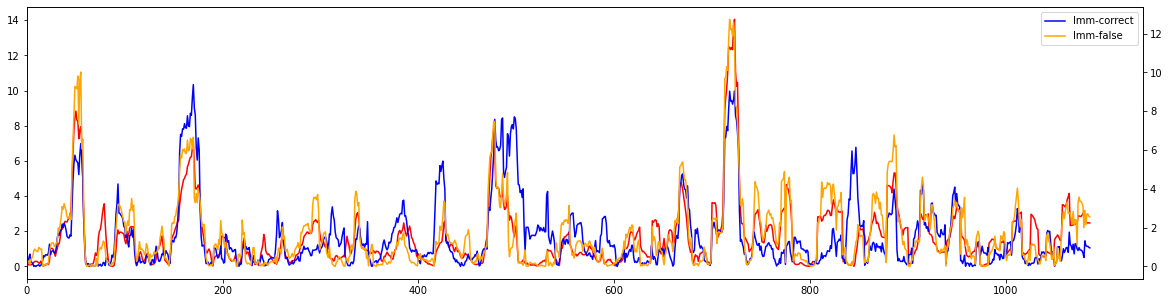

In [256]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,5))
ax.plot(data4all['loc'], data4all['lod'], color='red', label='r/qtl')
ax2 = ax.twinx()
ax2.plot(data4all['loc'], data4all['-logpval'],color='blue', label='lmm-correct')
ax2.plot(data4all['loc'], data4all['-logpval_st'], color='orange',label='lmm-false')

ax.set_xlim(0,)
plt.legend()
#ax.set_xticklabels(data3all['marker'])
plt.show()

In [151]:
dd3 = data3all.groupby('chr')

In [158]:
wahlberg2009 = pd.read_csv('20200901_liftover_old_qtl/R/20200902_QTLWahlberg2009_with_positions.csv')

In [159]:
wahlberg2009 = wahlberg2009.replace(float('NaN'), 'NA')

### translate Wahlberg 2009 MB into bin and plotting locations

In [161]:
leftbin = []
rightbin = []
leftloc = []
rightloc = []
for i , k in wahlberg2009.iterrows():
    if k['leftpos'] == 'NA':
        lb = 'NA'
    else:
        lb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['leftpos'])))

    if k['rightpos'] == 'NA':
        rb = 'NA'    
    else:
        rb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['rightpos'])))
    
    if (lb=='NA' and rb !="NA"):
        lb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['rightpos']-1))) # if lb is missing, take rb-1
        
    if (lb!='NA' and rb=="NA"):
        rb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['leftpos']+1))) # if lb is missing, take rb-1
    leftbin.append(lb)
    rightbin.append(rb)
    leftloc.append(data3all.loc[data3all['marker']==lb].iloc[0]['loc'])
    rightloc.append(data3all.loc[data3all['marker']==rb].iloc[0]['loc'])

        #print(lb, rb)

In [162]:
wahlberg2009['leftbin'] = leftbin
wahlberg2009['rightbin'] = rightbin
wahlberg2009['leftloc'] = leftloc
wahlberg2009['rightloc'] = rightloc

In [165]:
import copy

#### make scatter for stars on top of the peaks

In [166]:
star_Y = copy.deepcopy(data2all[['loc', 'lod']])
wbll = copy.deepcopy(wahlberg2009[["leftloc"]])
star_XY =wbll.merge(star_Y, left_on='leftloc', right_on='loc', how='left')

In [176]:

#Supplementary Table S2. The 11 SNP markers that are associated with 56-day body-weight,
#and located outside the nine fine-mapped QTL regions, ißn generation F15 of the Advanced
#Intercross Line between founders from generation 40 of the High- (HWS) and Low (LWS)
#body-weight selected Virginia chicken lines.

s2 = pd.read_csv('../auxillary_data/old_qtls/YZ2017_supp2_GG6.txt', comment='#', sep=',')
#s2

In [177]:
del(s2['Unnamed: 0'])

In [178]:
s2.columns = ['Marker', 'Chromosome','pos_gg6_Mb']
s2.Chromosome = [int(i.lstrip('chr')) for i in s2.Chromosome] # make chr into a number again 

In [179]:
chr_bin = []
plotloc = []

for i , k in s2.iterrows():
    if k['pos_gg6_Mb'] == 'NA':
        b = 'NA'
    else:
        b = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['pos_gg6_Mb'])))
    chr_bin.append(b)
    plotloc.append(data3all.loc[data3all['marker']==b].iloc[0]['loc'])


In [180]:
s2['bin'] = chr_bin
s2['loc'] = plotloc

# LOAD YZ2017


In [181]:
s3 = pd.read_csv('../auxillary_data/old_qtls/YZ2017_supp3_GG6.txt', comment='#', sep=',')
del(s3['Unnamed: 0'])
s3.columns = ['Marker', 'Chromosome','pos_gg6_Mb']
s3['Marker'] = [i.split('/')[0] for i in s3.Marker]
s3.Chromosome = [int(i.lstrip('chr')) for i in s3.Chromosome] # make chr into a number again 


In [182]:
chr_bin = []
plotloc = []
for i , k in s3.iterrows():
    if k['pos_gg6_Mb'] == 'NA':
        b = 'NA'
    else:
        b = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['pos_gg6_Mb'])))
    chr_bin.append(b)
    print(b)
    #print(data2all.loc[data2all['marker']==b].iloc[0]['loc'])
    if b == 'mrk_20_12':   # dirty hack because there is no 20-12 bin in my assembly
        plotloc.append(data3all.loc[data3all['marker']=='mrk_20_11'].iloc[0]['loc'])
    else:
        plotloc.append(data3all.loc[data3all['marker']==b].iloc[0]['loc'])
        

s3['bin'] = chr_bin
s3['loc'] = plotloc

mrk_1_170
mrk_1_173
mrk_2_60
mrk_2_112
mrk_3_34
mrk_3_34
mrk_4_1
mrk_4_11
mrk_7_16
mrk_7_16
mrk_7_24
mrk_7_24
mrk_20_12


In [183]:
jacobsson2005 = pd.read_csv('20200901_liftover_old_qtl/R/20200902_QTLWahlberg2009_with_positions.csv')

In [184]:
jacobsson2005 = jacobsson2005.replace(np.nan, 'NA')

In [186]:
leftbin = []
rightbin = []
leftloc = []
rightloc = []
for i , k in jacobsson2005.iterrows():
    if k['leftpos'] == 'NA':
        lb = 'NA'
    else:
        lb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['leftpos'])))

    if k['rightpos'] == 'NA':
        rb = 'NA'    
    else:
        rb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['rightpos'])))
    
    if (lb=='NA' and rb !="NA"):
        lb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['rightpos']-1))) # if lb is missing, take rb-1
        
    if (lb!='NA' and rb=="NA"):
        rb = 'mrk_' + str(k['Chromosome'])+'_'+str(int(np.floor(k['leftpos']+1))) # if lb is missing, take rb-1
    leftbin.append(lb)
    rightbin.append(rb)
    leftloc.append(data3all.loc[data3all['marker']==lb].iloc[0]['loc'])
    rightloc.append(data3all.loc[data3all['marker']==rb].iloc[0]['loc'])

        #print(lb, rb)

In [187]:
jacobsson2005['leftbin'] = leftbin
jacobsson2005['rightbin'] = rightbin
jacobsson2005['leftloc'] = leftloc
jacobsson2005['rightloc'] = rightloc

In [188]:
len(data3all)

1088

In [191]:
dd2 = data3all.groupby('chr')

### The plot

<ipython-input-281-d22da3ccfd7e>:227: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yt)


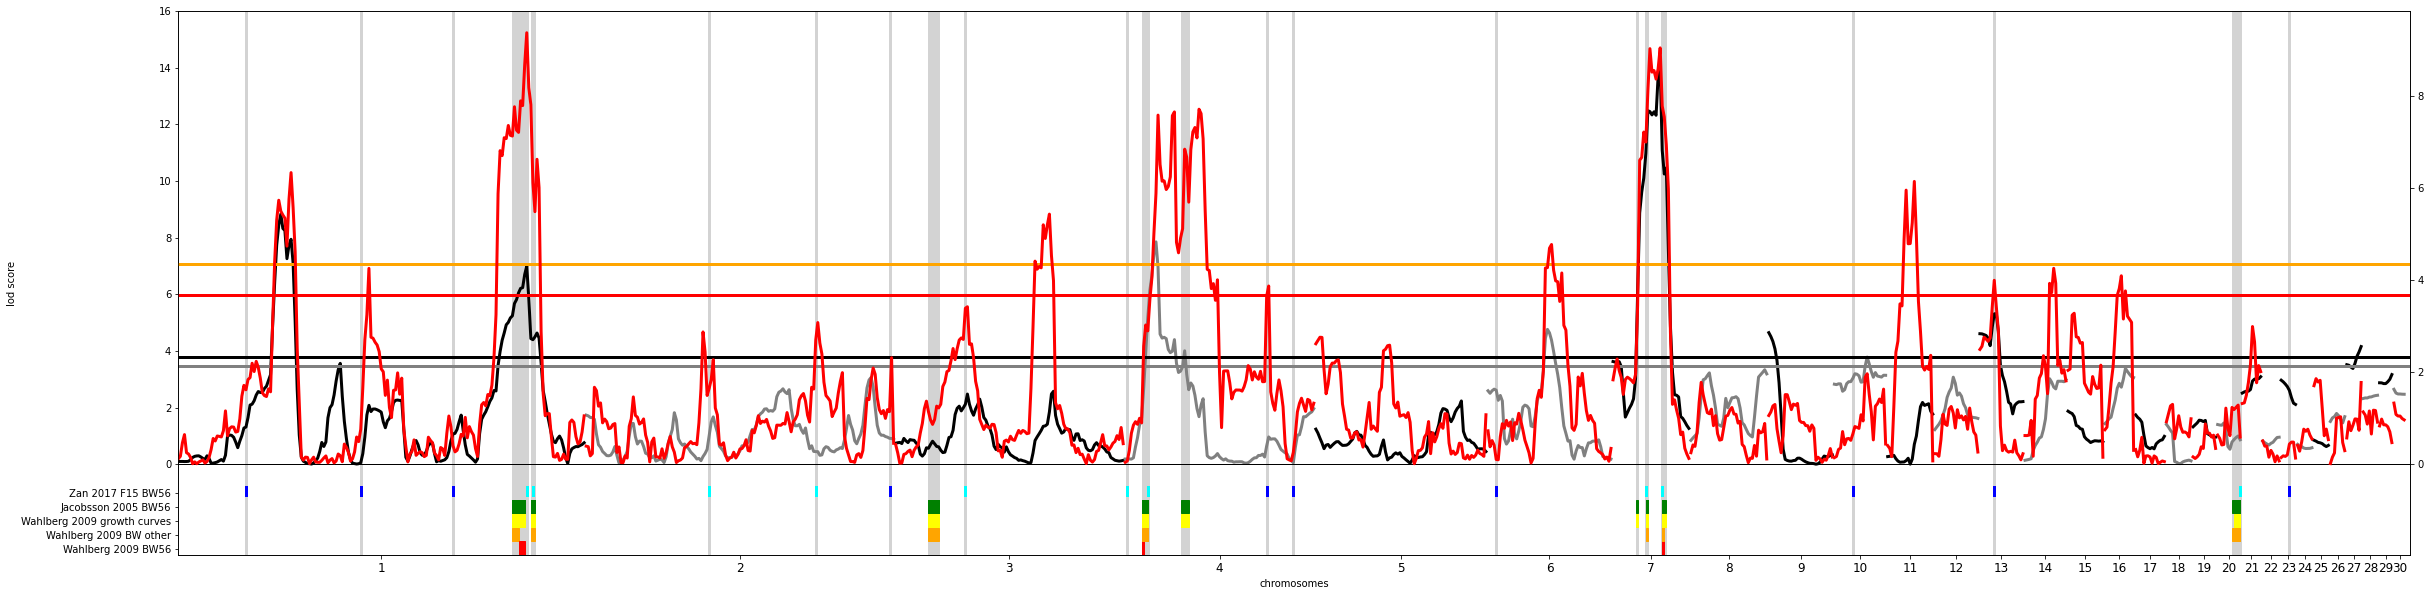

In [281]:
# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a
    
    

### Configure Ylabels     
yt = [
 plt.Text(0, -3.0, 'Wahlberg 2009 BW56'),
 plt.Text(0, -2.5, 'Wahlberg 2009 BW other'),
 plt.Text(0, -2.0, 'Wahlberg 2009 growth curves'),
 plt.Text(0, -1.5, 'Jacobsson 2005 BW56'),
 plt.Text(0, -1.0, 'Zan 2017 F15 BW56'),
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),
 plt.Text(0, 8.0, '8'),
 plt.Text(0, 10.0, '10'),
 plt.Text(0, 12.0, '12'),
 plt.Text(0, 14.0, '14'),
 plt.Text(0, 16.0, '16')]

ytt = np.array([-3.,-2.5,-2.,-1.5,-1., 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.])

####################################################################################################
# plotting
labelpos = []
labelname = []
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(40,10))

# plot the line for each chromosome
#for j, i in enumerate(dd2):
    #print(i[0],len(i[1]))
#    ax.plot( i[1]['loc'], i[1].lod, label='', alpha=1, color=b[j], lw=3) # plot the line
#    labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
#    labelname.append(i[0]) # append chromosome name to label-list

    
#ax.axhline(3.77, color='Black', lw=3) # 5% permutation threshold

#ax.axhline(0, color='Black', lw=1) # zero

#ax.axhline(3.46, color='Grey', lw=3) # 10 % permutation threshold
#ax.axhline(0, color='Black', lw=1) # zero



ax2 = ax.twinx()
ax2.axhline(0, color='Black', lw=1) # zero

ax2.axhline(4.337, color='orange', lw=3) # bonferroni
ax2.axhline(3.67, color='red', lw=3) # suggestive


# plot the line for each chromosome
for j, i in enumerate(dd2):
    #print(i[0],len(i[1]))
    ax2.plot( i[1]['loc'], i[1]['-logpval'], label='', alpha=1, color=b[j], lw=3) # plot the line
    #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
    #labelname.append(i[0]) # append chromosome name to label-list

    
#ax.axhline(3.77, color='Black', lw=3) # 5% permutation threshold

#ax.axhline(0, color='Black', lw=1) # zero

#ax.axhline(3.46, color='Grey', lw=3) # 10 % permutation threshold




#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='lightgrey', lw=3, alpha=1, label='Zan2017', zorder=0)


for i, k in s3.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='lightgrey', lw=3, alpha=1, label='Zan2017', zorder=0)
#######################################################################################################
### plot lines for Jacobsson 2005

for i, k in jacobsson2005.iterrows():
   
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1, label='Jacobsson2005',zorder=0)

##########################################################################################
## Wahlberg 2009
 
#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    
    #color all BW8 qtls red: #######################################
    
    if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=0)

    # all other bw traits as orange ##################################
    
    #elif k['Trait'].startswith('BW'):
        
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='orange', lw=3, label='Wahlberg2009_BW_other')
        
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label='Wahlberg2009_BW_other',zorder=0)
        
    #all others as grey ###############################################
    
    #else:
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='Blue', alpha=0.6, label='Wahlberg2009_growthcurves')

        ### shade between left and right border #######################        
        ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1, label='Wahlberg2009_growthcurves',zorder=0)





#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='Blue', lw=3, alpha=1,ymin=0.11, ymax=0.125, label='Zan2017')

for i, k in s3.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='Cyan', lw=3, alpha=1,ymin=0.11, ymax=0.125, label='Zan2017')

#######################################################################################################
### plot lines for Jacobsson 2005

for i, k in jacobsson2005.iterrows():
   
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    ax.axvspan(qtlleft, qtlright, color='green',ymin=0.076, ymax=0.1, alpha=1, label='Jacobsson2005')
    
    ## simple line instead 
    #ax.axvline(qtlleft, color='green', lw=3, alpha=0.5, label='Jacobsson2005')




#########################################################################################
## Wahlberg 2009
 
#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    
    #color all BW8 qtls red: #######################################
    
    if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56")

    # all other bw traits as orange ##################################
    
    elif k['Trait'].startswith('BW'):
        
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='orange', lw=3, label='Wahlberg2009_BW_other')
        
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='Orange',ymin=0.026, ymax=0.05, alpha=1,label='Wahlberg2009_BW_other')
        
    #all others as grey ###############################################
    
    else:
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='Blue', alpha=0.6, label='Wahlberg2009_growthcurves')

        ### shade between left and right border #######################        
        ax.axvspan(qtlleft, qtlright, color='Yellow', alpha=1,ymin=0.051, ymax=0.075, label='Wahlberg2009_growthcurves')

        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='lower right')
                

#plt.legend()
ax.set_ylabel('lod score')
ax.set_xlabel('chromosomes')
ax.set_xlim(0,1089)
ax.set_ylim(-3.2,)
ax.set_xticks(labelpos)
ax2.set_ylim(-1.98,)

ax.set_xticklabels(labelname, size=12)
ax.set_yticklabels(yt)
ax.set_yticks(ytt)
#ytt = ax.get_yticks()
plt.show()

In [ ]:
# make colors for the plot
#a = ['Grey', 'Black']
a = ['Black','Grey']

#a = ['Red', 'Black']
b=[]
for i in range(15):
    b = b+a
    
    

### Configure Ylabels     
yt = [
 plt.Text(0, -3.0, 'Wahlberg 2009 BW56'),
 plt.Text(0, -2.5, 'Wahlberg 2009 BW other'),
 plt.Text(0, -2.0, 'Wahlberg 2009 growth curves'),
 plt.Text(0, -1.5, 'Jacobsson 2005 BW56'),
 plt.Text(0, -1.0, 'Zan 2017 F15 BW56'),
 plt.Text(0, 0.0, '0'),
 plt.Text(0, 2.0, '2'),
 plt.Text(0, 4.0, '4'),
 plt.Text(0, 6.0, '6'),
 plt.Text(0, 8.0, '8'),
 plt.Text(0, 10.0, '10'),
 plt.Text(0, 12.0, '12'),
 plt.Text(0, 14.0, '14'),
 plt.Text(0, 16.0, '16')]

ytt = np.array([-3.,-2.5,-2.,-1.5,-1., 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.])

####################################################################################################
# plotting
labelpos = []
labelname = []
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(40,10))

# plot the line for each chromosome
#for j, i in enumerate(dd2):
    #print(i[0],len(i[1]))
#    ax.plot( i[1]['loc'], i[1].lod, label='', alpha=1, color=b[j], lw=3) # plot the line
#    labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
#    labelname.append(i[0]) # append chromosome name to label-list

    
#ax.axhline(3.77, color='Black', lw=3) # 5% permutation threshold

#ax.axhline(0, color='Black', lw=1) # zero

#ax.axhline(3.46, color='Grey', lw=3) # 10 % permutation threshold
#ax.axhline(0, color='Black', lw=1) # zero



ax2 = ax.twinx()
ax2.axhline(0, color='Black', lw=1) # zero

ax2.axhline(4.337, color='orange', lw=3) # bonferroni
ax2.axhline(3.67, color='red', lw=3) # suggestive


# plot the line for each chromosome
for j, i in enumerate(dd2):
    #print(i[0],len(i[1]))
    ax2.plot( i[1]['loc'], i[1]['-logpval'], label='', alpha=1, color=b[j], lw=3) # plot the line
    #labelpos.append(np.mean(i[1].index)) # get the mid position of the chromosome
    #labelname.append(i[0]) # append chromosome name to label-list

    
#ax.axhline(3.77, color='Black', lw=3) # 5% permutation threshold

#ax.axhline(0, color='Black', lw=1) # zero

#ax.axhline(3.46, color='Grey', lw=3) # 10 % permutation threshold




#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='lightgrey', lw=3, alpha=1, label='Zan2017', zorder=0)


for i, k in s3.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='lightgrey', lw=3, alpha=1, label='Zan2017', zorder=0)
#######################################################################################################
### plot lines for Jacobsson 2005

for i, k in jacobsson2005.iterrows():
   
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1, label='Jacobsson2005',zorder=0)

##########################################################################################
## Wahlberg 2009
 
#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    
    #color all BW8 qtls red: #######################################
    
    if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label="Wahlberg2009_BW56", zorder=0)

    # all other bw traits as orange ##################################
    
    #elif k['Trait'].startswith('BW'):
        
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='orange', lw=3, label='Wahlberg2009_BW_other')
        
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1,label='Wahlberg2009_BW_other',zorder=0)
        
    #all others as grey ###############################################
    
    #else:
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='Blue', alpha=0.6, label='Wahlberg2009_growthcurves')

        ### shade between left and right border #######################        
        ax.axvspan(qtlleft, qtlright, color='lightgrey', alpha=1, label='Wahlberg2009_growthcurves',zorder=0)





#######################################################################################################
### plot lines for Zan 2017

for i, k in s2.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='Blue', lw=3, alpha=1,ymin=0.11, ymax=0.125, label='Zan2017')

for i, k in s3.iterrows():
   
    ### simple line at left border ################################
    ax.axvline(k["loc"], color='Cyan', lw=3, alpha=1,ymin=0.11, ymax=0.125, label='Zan2017')

#######################################################################################################
### plot lines for Jacobsson 2005

for i, k in jacobsson2005.iterrows():
   
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    ax.axvspan(qtlleft, qtlright, color='green',ymin=0.076, ymax=0.1, alpha=1, label='Jacobsson2005')
    
    ## simple line instead 
    #ax.axvline(qtlleft, color='green', lw=3, alpha=0.5, label='Jacobsson2005')




#########################################################################################
## Wahlberg 2009
 
#### stars on top of the peak to indicate they have been seen before

#plt.scatter(star_XY['loc'], [ i+1 for i in star_XY['lod']], color='red', marker='*')

### logic for making a line at the location where Wahlberg 2009  previous qtls have been seen

for i, k in wahlberg2009.iterrows():
    qtlleft = k['leftloc']
    qtlright = k['rightloc']
    
    #color all BW8 qtls red: #######################################
    
    if k['Trait']=='BW56':
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='red', lw=3, alpha=0.5, label="Wahlberg2009_BW56")
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='red',ymax=0.025, alpha=1,label="Wahlberg2009_BW56")

    # all other bw traits as orange ##################################
    
    elif k['Trait'].startswith('BW'):
        
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='orange', lw=3, label='Wahlberg2009_BW_other')
        
        ### shade between left and right border #######################
        ax.axvspan(qtlleft, qtlright, color='Orange',ymin=0.026, ymax=0.05, alpha=1,label='Wahlberg2009_BW_other')
        
    #all others as grey ###############################################
    
    else:
        ### simple line at left border ################################
        #ax.axvline(qtlleft, color='Blue', alpha=0.6, label='Wahlberg2009_growthcurves')

        ### shade between left and right border #######################        
        ax.axvspan(qtlleft, qtlright, color='Yellow', alpha=1,ymin=0.051, ymax=0.075, label='Wahlberg2009_growthcurves')

        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc='lower right')
                

#plt.legend()
ax.set_ylabel('lod score')
ax.set_xlabel('chromosomes')
ax.set_xlim(0,1089)
ax.set_ylim(-3.2,)
ax.set_xticks(labelpos)
ax2.set_ylim(-1.98,)

ax.set_xticklabels(labelname, size=12)
ax.set_yticklabels(yt)
ax.set_yticks(ytt)
#ytt = ax.get_yticks()
plt.show()

## make model with bad generations

In [247]:
def make_stupid_chicken_model(marker, data, pheno='BW8',):
    #drop all individuals where marker is missing
    subset = data.loc[data[marker].isna()==False]
    subset.GENERATION = [int(i.strip('Ff')) for i in subset.GENERATION]
    md = smf.ols("{pheno} ~ {marker}+SEX+GENERATION".format(pheno=pheno, marker=marker), data=subset)
    try:
        mdf = md.fit()
        return marker, mdf.pvalues[marker], mdf
    except:
        print('linalgerror at marker {marker}'.format(marker=marker) )
        return marker, np.nan, None

In [248]:
st_pvals = {}
for marker in cross_markers:
    #print(marker)
    m, p, model = make_stupid_chicken_model(marker=marker, data=cross)
 #print(m, p)
    st_pvals[m]={'pvalue':p, 'model':model}

/home/tilman/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/tilman/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/tilman/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [249]:
st_l = []
for k, i in st_pvals.items():
    minlog = -1 * np.log10(i['pvalue'])
    st_l.append([k,minlog])

In [250]:
st_ldf = pd.DataFrame(st_l)

In [261]:
pp = []
for key, item in pvals.items():
    pp.append(item['pvalue'])

In [264]:
bh_corrected = sm.stats.multipletests(pvals = pp, method = 'fdr_bh')
bf_corrected = sm.stats.multipletests(pvals = pp, method = 'bonferroni')

In [283]:
bh_corrected[1]

array([0.83588667, 0.77914324, 0.4872646 , ..., 0.20381461, 0.2228245 ,
       0.23221367])

In [356]:
get_adjbonferroni_corrected_shitty_trick = sm.stats.multipletests(pvals = pp+[4.599816007359706e-05], method = 'fdr_bh')


In [357]:
get_adjbonferroni_corrected_shitty_trick[1][-1]

0.0005623145860682427

In [266]:
bf_corrected

(array([False, False, False, ..., False, False, False]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 4.7186829985279566e-05,
 4.599816007359706e-05)

In [271]:
# old permutation threshold 5%
-1 * np.log10(1.54512032152978e-05)

4.811037695564851

In [272]:
# bonferroni
-1 * np.log10(4.599816007359706e-05)

4.337259539750276

In [273]:
#old suggestive
#0.000216061584399696

-1 * np.log10(0.000216061584399696)

3.665422443511561

In [311]:
pvals['mrk_4_16']['model'].params['mrk_4_16']

25.242537928223072

In [305]:
pvals['mrk_4_15']['model'].bse_fe['mrk_4_15']

4.557777577019251